In [1]:
import orbit_classes as o
import numpy as np
import glob
from astropy.io import ascii as a
from astropy.time import Time
import matplotlib.pyplot as plt
#import h5py

from importlib import reload

In [2]:
reload(o)

<module 'orbit_classes' from '/Users/annaboehle/research/code/orbits/orbit_classes.py'>

In [3]:
star = o.Star('40_eri',4.98,(2.8,5.6,8.4),{'Lp':2.370},0.67)  

Set up simulation

In [4]:
del_a = 2.
a_arr = np.arange(del_a/2., 2.0*star.dist*4.0,del_a) 

del_m_p = 3.
m_p_arr = np.arange(del_m_p/2., 50, del_m_p) 

### RV data set

In [31]:
def get_rv_timeseries(star):
    rvDir = '/Users/annaboehle/research/analysis/archival_stars/rv_calibrated'

    file_ls = glob.glob('{:s}/{:s}/{:s}*cal.dat'.format(rvDir, star, star))
    rv_epochs = []
    rv_meas = []
    for f in file_ls:
        rv_tab = a.read(f,names=('rjd','vrad'))
        # rv_epochs.append(ascii.read(f))
        rv_epochs.extend(rv_tab['rjd'][:])
        rv_meas.extend(rv_tab['vrad'][:])

    return np.array(rv_epochs, dtype=float) + 2400000, np.array(rv_meas)

In [50]:
t, rv_meas=get_rv_timeseries('40_eri')
rv_dataset = o.RVDataSet(t, rv_meas,star)

In [53]:
sim = o.CompletenessMC(m_p_arr,a_arr,1000,[rv_dataset])

In [54]:
out=sim.run()

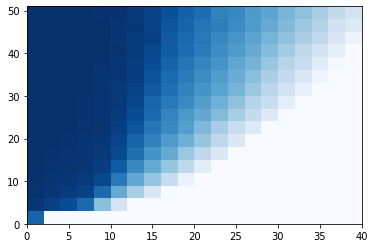

In [57]:
plt.imshow(out[0]*100.,origin='lower',cmap='Blues', 
           extent=[0,sim.a_arr[-1]+del_a*0.5,0,sim.mp_arr[-1]+del_m_p*0.5],aspect='auto',vmin=0,vmax=100)  

### HCI data set

In [5]:
star_name = '40_eri'

In [6]:
t_hci = Time('2008-11-16')
print(t_hci.decimalyear)

2008.8743169398906


In [7]:
sep = np.array([0.345, 0.445, 0.545, 0.645, 0.745, 0.845, 0.945, 1.045, 1.145,
       1.245, 1.345, 1.445, 1.545, 1.645, 1.745, 1.845, 1.945])
contrast = np.array([ 5.89398451, 11.13199795, 12.00855101, 12.57479667, 13.07858451,
       12.83411251, 13.42493691, 13.52553135, 13.56641038, 13.78909367,
       13.7870043 , 13.68065617, 13.70834146, 13.83224703, 13.74749432,
       13.73895328, 13.70722755])

In [8]:
reload(o)
hci_dataset = o.ImagingDataSet(t_hci.decimalyear,
                               sep,
                               contrast,
                               star,
                               "L'")

In [9]:
model = o.ContrastModel('phoenix')

In [10]:
sim = o.CompletenessMC(m_p_arr,a_arr,1000,[hci_dataset],model)

In [ ]:
out=sim.run()

In [1]:
model.get_contrast?

Object `model.get_contrast` not found.
